In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración visual
plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")


In [2]:
# Cargar el dataset
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

# Vista general
df.head()


,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [3]:
# Información básica
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


Part 1: Understanding Product Categories
Business Question

¿Cuáles son las categorías más populares en Amazon UK y cómo se comparan en frecuencia?

In [4]:
category_freq = df["category"].value_counts()
category_freq.head(10)


category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Manicure & Pedicure Products               18940
Skin Care                                  18769
Make-up                                    18756
Hair Care                                  18735
Fragrances                                 18564
Name: count, dtype: int64

In [5]:
top5_categories = category_freq.head(5)
top5_categories


category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

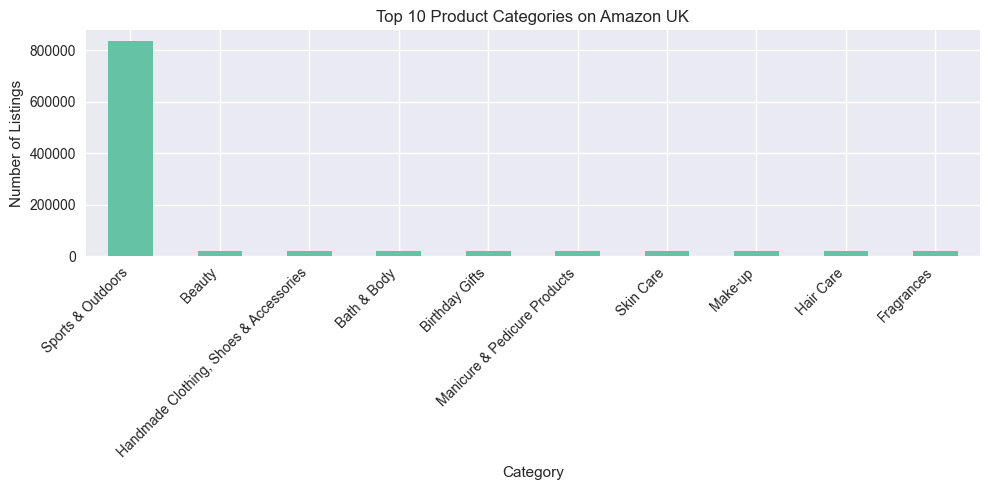

In [6]:
#2. Visualizaciones
#Bar Chart – Top 10 categorías

top10_categories = category_freq.head(10)

plt.figure(figsize=(10,5))
top10_categories.plot(kind="bar")
plt.title("Top 10 Product Categories on Amazon UK")
plt.xlabel("Category")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


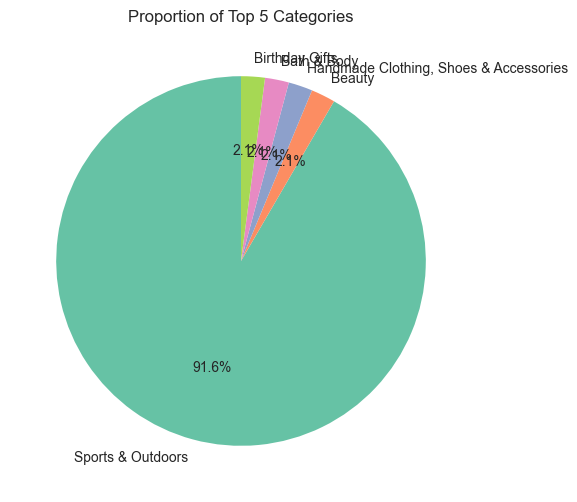

In [7]:
plt.figure(figsize=(6,6))
top5_categories.plot(
    kind="pie",
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Proportion of Top 5 Categories")
plt.ylabel("")
plt.show()


In [8]:
price_mean = df["price"].mean()
price_median = df["price"].median()
price_mode = df["price"].mode()[0]

price_mean, price_median, price_mode


(89.24380943923663, 19.09, 9.99)

In [9]:
price_variance = df["price"].var()
price_std = df["price"].std()
price_range = df["price"].max() - df["price"].min()
price_iqr = df["price"].quantile(0.75) - df["price"].quantile(0.25)

price_variance, price_std, price_range, price_iqr


(119445.48532254907, 345.60886175349884, 100000.0, 36.0)

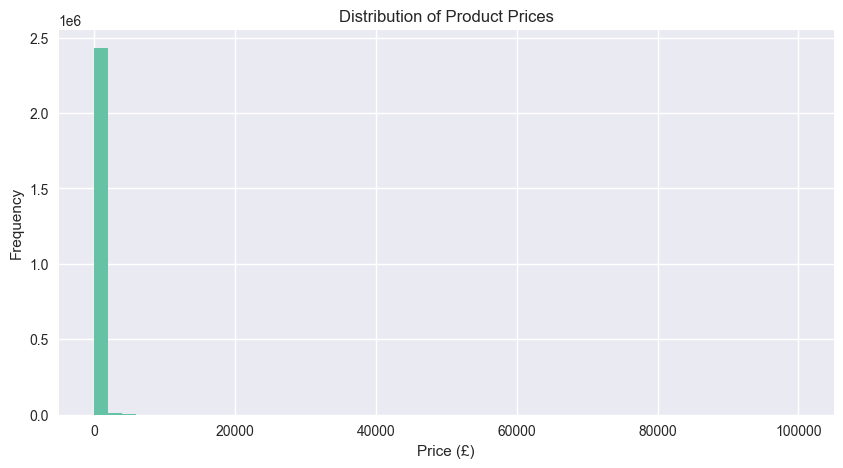

In [10]:
plt.figure(figsize=(10,5))
plt.hist(df["price"], bins=50)
plt.title("Distribution of Product Prices")
plt.xlabel("Price (£)")
plt.ylabel("Frequency")
plt.show()


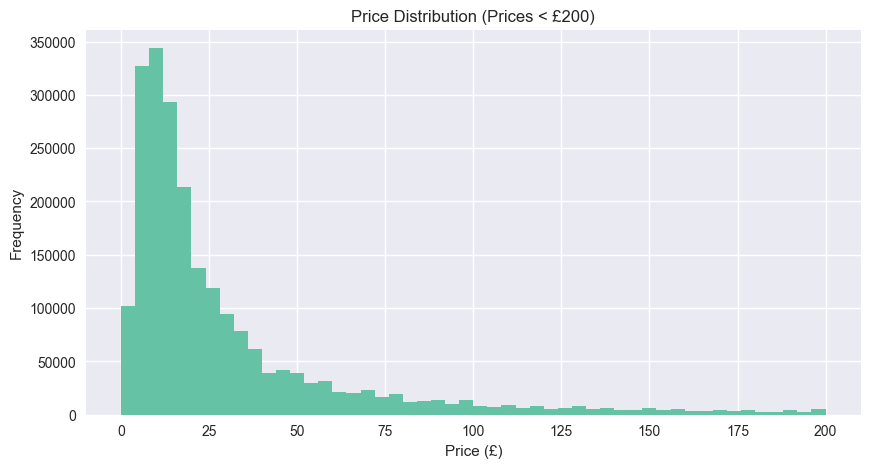

In [11]:
plt.figure(figsize=(10,5))
plt.hist(df[df["price"] < 200]["price"], bins=50)
plt.title("Price Distribution (Prices < £200)")
plt.xlabel("Price (£)")
plt.ylabel("Frequency")
plt.show()


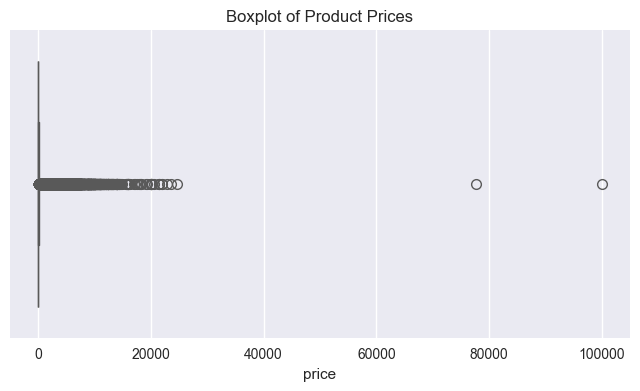

In [12]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df["price"])
plt.title("Boxplot of Product Prices")
plt.show()


In [13]:
rating_mean = df["stars"].mean()
rating_median = df["stars"].median()
rating_mode = df["stars"].mode()[0]

rating_mean, rating_median, rating_mode


(2.152836472966065, 0.0, 0.0)

In [14]:
rating_variance = df["stars"].var()
rating_std = df["stars"].std()
rating_iqr = df["stars"].quantile(0.75) - df["stars"].quantile(0.25)

rating_variance, rating_std, rating_iqr


(4.817434029796862, 2.1948653785134207, 4.4)

In [15]:
rating_skewness = df["stars"].skew()
rating_kurtosis = df["stars"].kurtosis()

rating_skewness, rating_kurtosis


(0.08120735761080985, -1.9260061280432985)

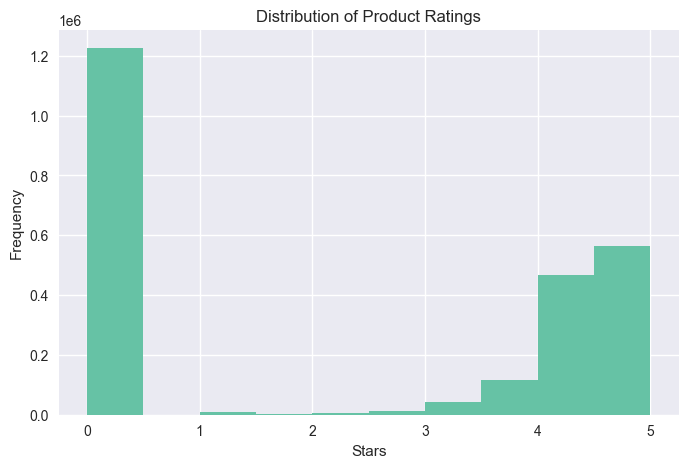

In [16]:
plt.figure(figsize=(8,5))
plt.hist(df["stars"], bins=10)
plt.title("Distribution of Product Ratings")
plt.xlabel("Stars")
plt.ylabel("Frequency")
plt.show()
